## Этап 1. Испортирование библиотек, данных. Знакомство с данными.

### 1.1 Импортирование библиотек

In [62]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файлов и знакомство с данными

Прочитаем нужные для работы датасеты и сохраним их в переменные **hypothesis**, **orders**, **visitors** :

In [63]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Рассмотрим каждый датасет в дальнейшем более подробно.

#### 1.2.1 hypothesis

Данный датасет хранит в себе гипотезы. Посмотрим на весь датасет :

In [64]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Здесь предоставлены 9 строк с гипотезами и также такие столбцы как :
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Для удобства изменим регистр столбцов на нижний :

In [65]:
hypothesis.columns = hypothesis.columns.str.lower()

Вызовем общую информацию и посмотрим нет ли искаженных типов данных, пропусков:

In [66]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных в порядке, пропусков нет.

Проверим данные на наличие явных дубликатов:

In [67]:
hypothesis.duplicated().sum()

0

Дубликатов нет. 

#### 1.2.2 orders

Данный датасет хранит в себе заказы. Посмотрим на 10 случайных строк датасета:

In [68]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
7,2626614568,78758296,2019-08-15,1044,A
405,2160002122,619764962,2019-08-03,870,B
1015,4262851755,1294878855,2019-08-31,570,A
393,3384227820,2582702340,2019-08-25,1253,B
589,2476870871,916684595,2019-08-20,5740,B
213,394880746,3332057097,2019-08-02,2750,B
15,2550768810,2742574263,2019-08-15,15277,B
657,2081053731,3572819427,2019-08-26,7024,A
470,2234122314,3310105714,2019-08-03,8780,B
45,837819976,1471496742,2019-08-16,2140,A


Данный датасет включает в себя такие столбцы как:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Вызовем общую информацию и посмотрим нет ли искаженных типов данных, пропусков:

In [69]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет, но в столбцах *date*  изменим типы данных.

Для *date* изменим тип данных на временной:

In [70]:
orders['date'] = pd.to_datetime(orders['date'])

Проверим данные на наличие явных дубликатов:

In [71]:
orders.duplicated().sum()

0

Дубликатов нет.

#### 1.2.3 visitors

Данный датасет хранит информацию о посещениях пользователей. Выведем 10 случайных строк датасета:

In [72]:
visitors.sample(10)

,date,group,visitors
0,2019-08-01,A,719
30,2019-08-31,A,699
4,2019-08-05,A,756
18,2019-08-19,A,502
20,2019-08-21,A,646
1,2019-08-02,A,619
32,2019-08-02,B,581
11,2019-08-12,A,595
2,2019-08-03,A,507
34,2019-08-04,B,770


Данный датасет хранит в себе такие столбцы как:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Вызовем общую информацию и посмотрим нет ли искаженных типов данных, пропусков:

In [73]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, но в столбцах *date* изменим типы данных.

Для *date* изменим тип данных на временной:

In [74]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на наличие явных дубликатов:

In [75]:
visitors.duplicated().sum()

0

Явных дубликатов нет.

### 1.3 Вывод

Познакомившись с датасетами подчеркнем, что в целом данные в хорошем качестве, пропусков и дубликатов нет. В датасете с гипотезами был изменен регистр столбцов на нижний. В датасете с заказами и посетителями был изменен тип данных для времени на временной и для группы на категории.

## Этап 2. Приоритизация гипотез. Анализ A/B-теста.

###  2.1 Приоритизация гипотез.

#### 2.1.1 Фреймворк ICE

Создадим столбец с **ICE** :

In [77]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Рассмотрим гипотезы в порядке убывания по **ICE**:

In [78]:
pd.set_option("display.max_colwidth", 150)
hypothesis[['hypothesis','ice']].sort_values('ice',ascending = False)


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Фреймворк **ICE** дает понять, что наиболее перспективная гипотеза это - **Запустить акцию, дающую скидку на товар в день рождения**,следом идет гипотеза - **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**. Замыкает тройку - **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**. Наименее перспективная гипотеза - **Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.**

#### 2.1.2 Фреймворк RICE

Создадим столбец с **RICE** :

In [79]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Рассмотрим гипотезы в порядке убывания по **RICE**:

In [80]:
hypothesis[['hypothesis','rice']].sort_values('rice',ascending = False)


,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Фреймворк **RICE** дает понять, что наиболее перспективная гипотеза это - **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**,следом идет гипотеза - **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**. Замыкает тройку - **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**. Наименее перспективная гипотеза - **Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.**

#### 2.1.3 Изменение приоритизации гипотез в зависимости от выбора фреймворка **ICE** или **RICE**. 

Выведем гипотезы с **ICE** и **RICE** в порядке убывания по **RICE**:

In [81]:
hypothesis[['hypothesis','ice','rice']].sort_values('rice',ascending = False)


,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


Как видим приоритезация меняется, на это влияет **reach - скольких пользователей затронет изменение, которое хотим внести**. Особенно ярко это можно заметить по гипотезе - **Запустить акцию, дающую скидку на товар в день рождения**, по **ICE** это гипотеза самая перспективная, в то время по **RICE** можно учесть, что эта акция не имеет влиятельного охвата, в связи с этим это гипотеза опускается на 5 место по приоритету. Наименее же перспективная гипотеза - **Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей**, совпадает у **ICE** и **RICE**.

### 2.2 Анализ A/B-теста

#### 2.2.1 График кумулятивной выручки по группам. 

Создадим массив уникальных пар значений даты и группы:

In [82]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах:

In [83]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [84]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия:

In [86]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A:

In [87]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:

In [88]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим графики кумулятивной выручки:

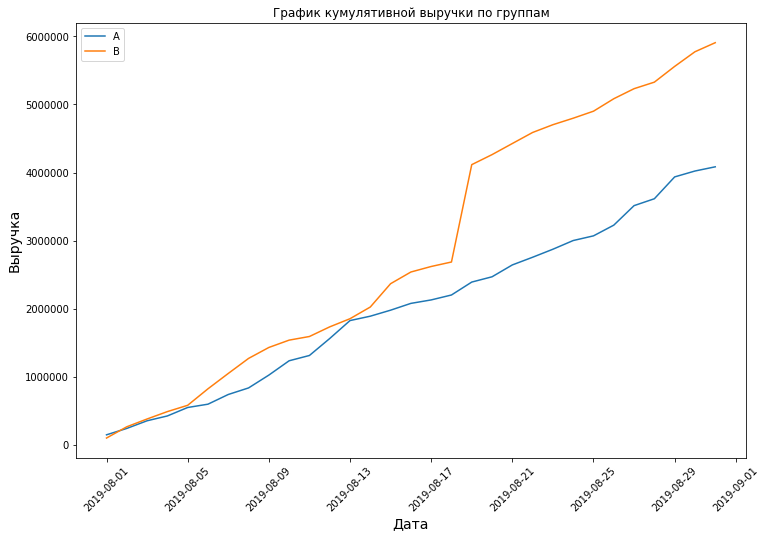

In [89]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка",fontsize=14)
plt.xlabel("Дата",fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выручка почти равномерно растет в течении всего времени. Но по графику группы B можно увидеть резкий скачок между 08-17 и 08-21, это может быть как увеличевшееся число заказов, так и сумма заказов, предполагающее наличие дорогих товаров в чеке.

#### 2.2.2 График кумулятивного среднего чека по группам. 

Построим графики кумулятивного среднего чека:

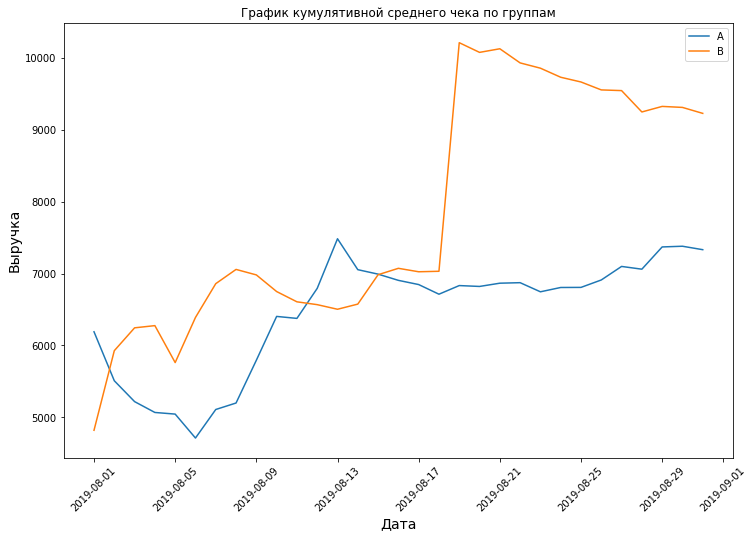

In [90]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивной среднего чека по группам')
plt.ylabel("Выручка",fontsize=14)
plt.xlabel("Дата",fontsize=14)
plt.xticks(rotation=45)
plt.legend() 
plt.show()


Средний чек изначально не очень равномерен, но под конец становится равномерным. В промежутке между 08-17 и 08-21 виден резкий скачок, как и в графике кумулятивной выручки. В конце графика видим тенденцию к спаду по группе B, в то время как по группе A , заметных колебаний нет.

#### 2.2.3 График относительного изменения кумулятивного среднего чека группы B к группе A. 

Соберем данные в один датафрейм:

In [91]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим отношения средних чеков с добавлением оси X:

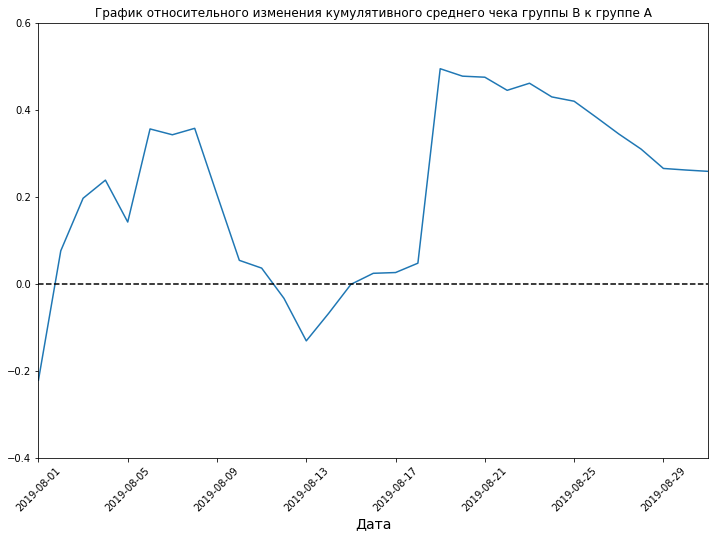

In [92]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата",fontsize=14)
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.6])
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Можно предположить, что именно тогда были осуществлены аномальные заказы. Опять же и тут можно заметить на резкий скачок в промежутке между 08-17 и 08-21. Все три графика демонстрируют общую картину. 

#### 2.2.4 График кумулятивной конверсии по группам. 

Посчитаем кумулятивную конверсию:

In [93]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные по группам:

In [94]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график:

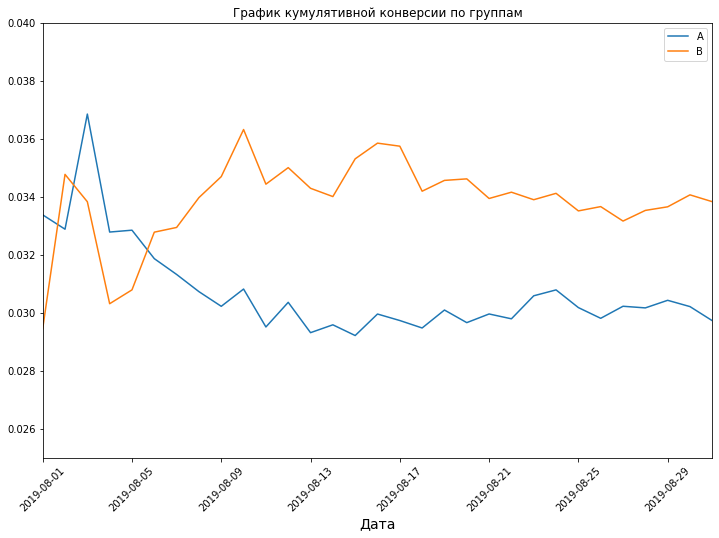

In [95]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel("Дата",fontsize=14)
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.040])
plt.legend()
plt.show()

В начале теста сегмент A имел большую конверсию, однако с 08-06 конверсия B имеет преимущество. В Конце теста, можно увидеть стабилизацию по обоим сегментам.

#### 2.2.5 График относительного изменения кумулятивной конверсии группы B к группе A. 

Соберем данные в один датафрейм:

In [96]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график относительного различия кумулятивных конверсий:

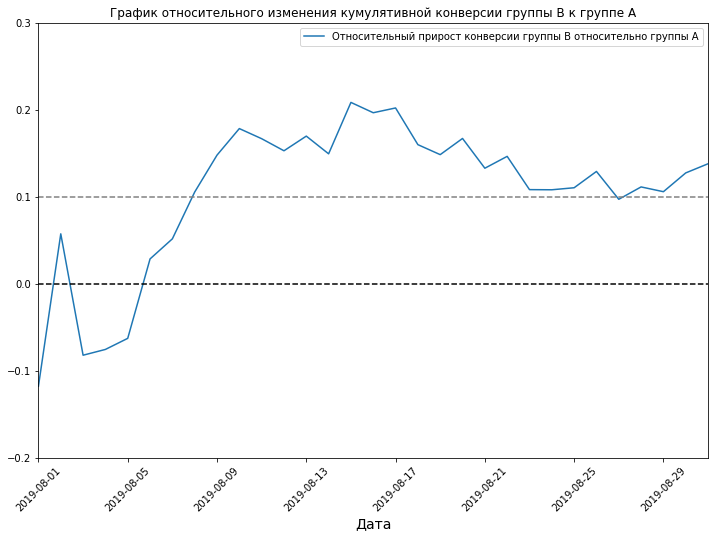

In [97]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel("Дата",fontsize=14)
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])
plt.show()

Данный график демонстрирует изначально ниже конверсию сегмента B,но затем стабильно более высокую конверсию в течении всего времени.

#### 2.2.6 Точечный график количества заказов по пользователям.

Найдем количество заказов по пользователям:

In [98]:
ordersByUsers = orders.drop(['group','revenue','date'], axis = 1).groupby('visitorId',as_index=False).agg({'transactionId' :  pd.Series.nunique}).rename(columns={'transactionId':'orders'}).sort_values('orders', ascending = False)

Посмотрим на полученную таблицы:

In [99]:
ordersByUsers

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Посмотрим визуально распределение на гистограмме:

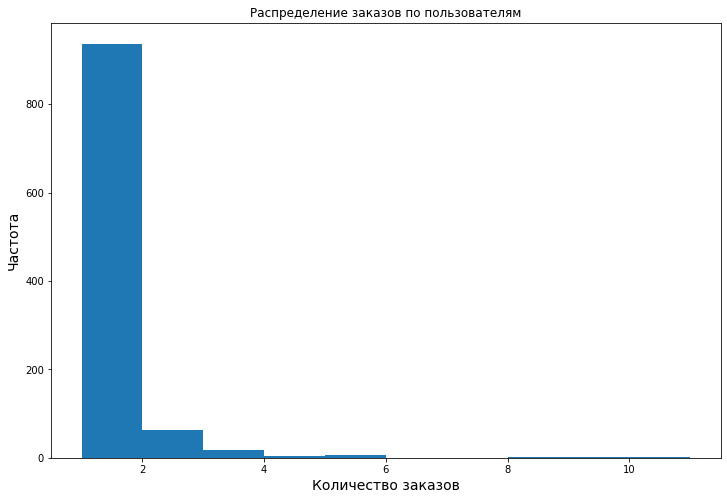

In [100]:
plt.figure(figsize=(12,8))
plt.hist(ordersByUsers['orders'])
plt.title('Распределение заказов по пользователям')
plt.ylabel("Частота",fontsize=14)
plt.xlabel("Количество заказов",fontsize=14)
plt.show()

Большинство пользователей делало заказ 1 раз, но встречеются и те , кто делал повторные заказы, и даже 10 заказов. Рассмотрим более подробно на другом графике:

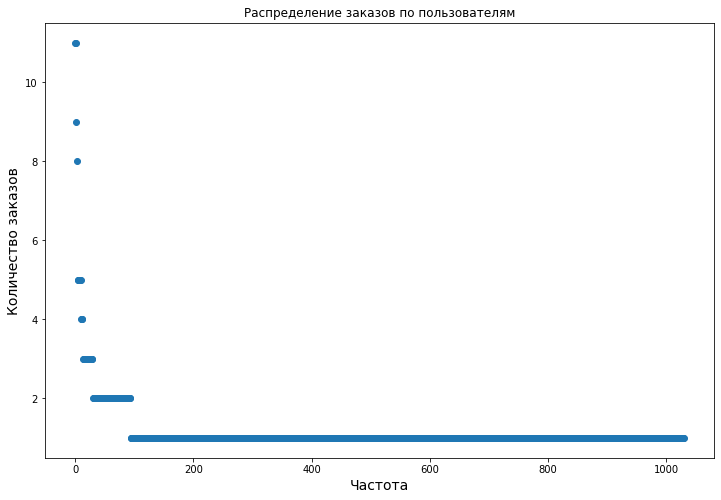

In [101]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение заказов по пользователям')
plt.xlabel("Частота",fontsize=14)
plt.ylabel("Количество заказов",fontsize=14)
plt.show()

Пользователей заказавших более 2 заказов ни так много. Вполне возможно эти заказы могут являться аномальными значениями.

#### 2.2.7 95-й и 99-й перцентили количества заказов на пользователя.

Рассмотрим 95 и 99 перцентили количества заказов на пользователя:

In [102]:
print('Не более 5% процентов пользователей  совершали более {:.0f} заказов'.format(np.percentile(ordersByUsers['orders'],95)))
print('Не более 1% процент пользователей совершали более {:.0f} заказов'.format(np.percentile(ordersByUsers['orders'],99)))

Не более 5% процентов пользователей  совершали более 2 заказов
Не более 1% процент пользователей совершали более 4 заказов


Примем за аномальных пользователей тех, кто совершил более 2 заказов.

#### 2.2.8 Точечный график стоимостей заказов.

Посмотрим визуально распределение на гистограмме:

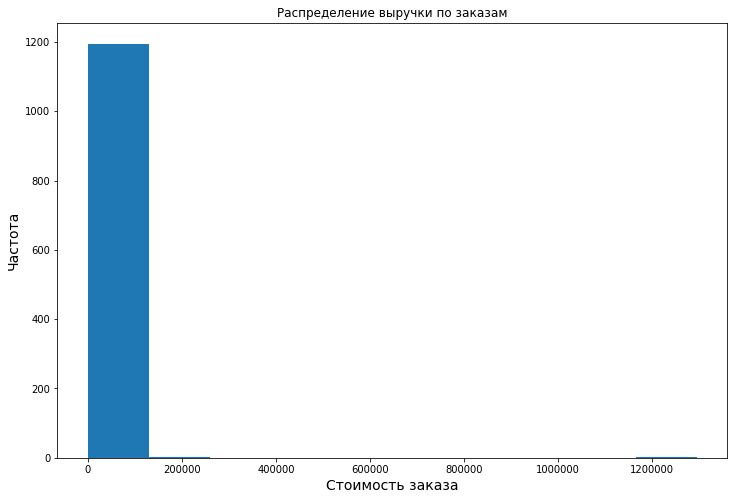

In [103]:
plt.figure(figsize=(12,8))
plt.hist(orders['revenue'])
plt.title('Распределение выручки по заказам')
plt.ylabel("Частота",fontsize=14)
plt.xlabel("Стоимость заказа",fontsize=14)
plt.show()

Сумма большинства заказов меньше 200 000 рублей. Однако по данной гистограмме ничего не сказать о более дорогих заказах, ровно как и более дешевых. Кроме того распределение - не нормальное. Попробуем другой вид графика:

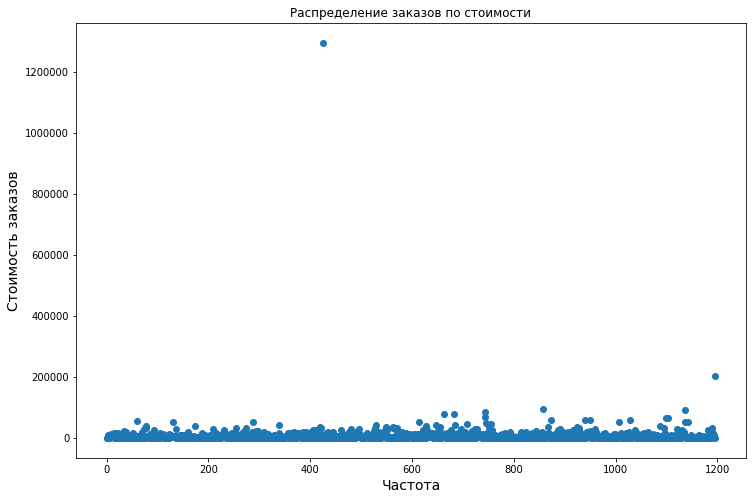

In [104]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.title('Распределение заказов по стоимости')
plt.xlabel("Частота",fontsize=14)
plt.ylabel("Стоимость заказов",fontsize=14)
plt.show()

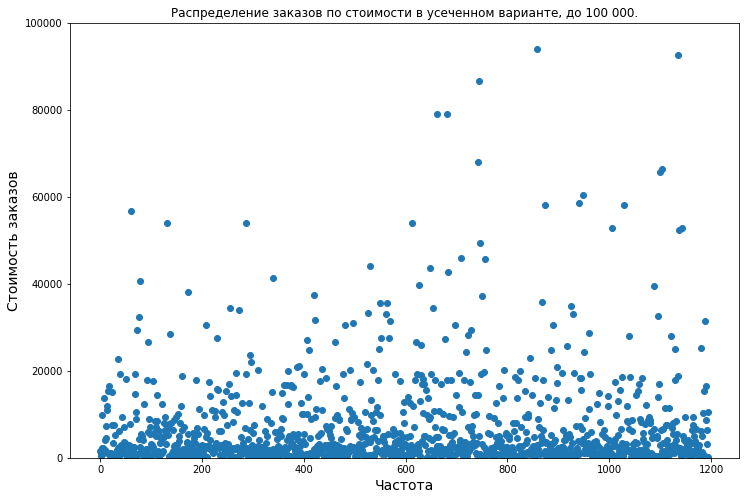

In [105]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.title('Распределение заказов по стоимости в усеченном варианте, до 100 000.')
plt.xlabel("Частота",fontsize=14)
plt.ylabel("Стоимость заказов",fontsize=14)
plt.ylim(0, 100000)
plt.show()

Заказов дороже 200 тысяч ни так много. Заказ, который дороже 1.2 явно аномальный, ровно как и тот,что в районе 200 000 рублей. 

#### 2.2.9 95-й и 99-й перцентили стоимости заказов.

Рассмотрим 95 и 99 перцентили стоимости заказов:

In [106]:
print('Не более 5% процентов заказов более {:.0f} рублей'.format(np.percentile(orders['revenue'],95)))
print('Не более 1% процент заказов более {:.0f} рублей'.format(np.percentile(orders['revenue'],99)))

Не более 5% процентов заказов более 28000 рублей
Не более 1% процент заказов более 58233 рублей


Примем за аномальные значения, заказы более 28000 рублей.

#### 2.2.10 Cтатистическая значимость различий в конверсии между группами по «сырым» данным.

Для начала подготовим данные:

Разграничим посетителей по группам:

In [107]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


Посчитаем сумарное количество заказов по группам:

In [108]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


Объединим все в одну таблицу:

In [109]:
data =(
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посмотрим на 5 строк таблицы:

In [110]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Таблица содержит такие столбцы как:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [111]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [112]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [113]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.008
0.138


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A составляет 13.8 %.

Нулевая гипотеза - Между конверсия значимой разницы нет. Альтернативаная, разница есть.

In [114]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,True,'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A составляет 13.8 %.

#### 2.2.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов, также найдём относительные различия в среднем чеке между группами:

In [115]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value больше 0.05, значит нулевую гипотезу не отвергаем. Относительное различие среднего чека между сегментами составляет 25.9%.

Нулевая гипотеза - Между средними чеками значимой разницы нет. Альтернативаная, разница есть.

In [116]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],True, 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value больше 0.05, значит нулевую гипотезу не отвергаем. Относительное различие среднего чека между сегментами составляет 25.9%.

#### 2.2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Ранее было установлено, что пользователи заказавшиеся больше 2 заказов, будут подпадать под аномальные, и также заказы, стоимостью более 28000 рублей.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [117]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print("Всего аномальных пользователей: {}".format(abnormalUsers.shape[0]))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных пользователей: 74


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [118]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0,)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [119]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.173


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше A на 17.3%.

 Нулевая гипотеза - Между конверсиями значимой разницы нет. Альтернативаная, разница есть.

In [120]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True,'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше A на 17.3%.

####  2.2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Передадим критерию mannwhitneyu() данные о выручке с заказов, также найдём относительные различия в среднем чеке между группами:

In [121]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],)[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1))

0.369
-0.020


P-value практически не изменился, однако относительное различие в среднем чеке между группами изменилось сильно, и после удаления выбросов, группа B имеет средний чек ниже группы A, ниже на 2%.

Нулевая гипотеза - Между средними чеками значимой разницы нет. Альтернативаная, разница есть.

In [122]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],True,'two-sided')[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1))

0.738
-0.020


P-value практически не изменился, однако относительное различие в среднем чеке между группами изменилось сильно, и после удаления выбросов, группа B имеет средний чек ниже группы A, ниже на 2%.

**Выводы:**
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым данным и после того, как избавились от аномалий нет статистически значимого различия по среднему чеку между группами.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

**Решение:**
* Остановить тест, признать его успешным, победа присуждена группе B,несмотря на то, что низкий средний чек после очистки данных составляет 2%, его конверсия, выше группы A на 17.3%.

## Этап 3. Выводы

Перед нами стояла цель приоритизировать гипотезы, запустить A/B тест и проанилизировать результаты. В нашем распоряжении были данные 3 датасетов:
* гипотезы
* заказы
* посетители

В процессе предобработки были изменены типы данных в заказах и посетелитях на временные значения, также в датасете с гипотезами для удобства работы с кодом был изменен регистр столбцов на нижних. Убедились, что в данных нет пропусков, также нет дубликатов.

В дальнейшем с помощью фреймворков ICE и RICE были приоритизированы гипотезы. В ходе процесса был сделан вывод, о том, что в целом приорититнее использовать фреймворк RICE, если есть данные с охватом или возможность его оценить. Ибо он более точее при приоритизации некотрых гипотез с акциями, например - Акция со скидкой ко Дню Рождения. Но все же топ-5 гипотез сошелся, это такие гипотезы как(Приоритизация по RICE в порядке убывания) :
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(112)
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(56)
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(40)
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(40)
* Запустить акцию, дающую скидку на товар в день рождения(16.2)

В ходе анализа A/B теста было выявлено:
* Кумулятивная выручка почти равномерно растет в течении всего времени
* Средний чек имеет колбеания вначале как в группе A, так и B, и становится более стабильным в конце анализа, при том
* Есть аномальные значения
* Конверсия группы B больше конверсия A со временем, хотя изначально группа A имела большую конверсию
* Аномальные значения заказов те, которые больше 2
* Аномальныя значения стоимости заказов те, которые свыше 28000 рублей
* Нулевая гипотеза о значительных различиях в конверсии между группами по «сырым» данным была отвергнута. Относительный прирост конверсии группы B к конверсии группы A составляет 13.8 %.
* Нулевую гипотезу  о значительной разнице в средних чеках между группами по «сырым» данным не отвергаем. Относительное различие среднего чека между сегментами составляет 25.9%.
* Нулевая гипотеза о значительных различиях в конверсии между группами по «очищенным» данным была отвергнута. Сегмент B значительно лучше A на 17.3%.
*  Нулевую гипотезу  о значительной разнице в средних чеках между группами по «очищенным» данным не отвергаем. группа B имеет средний чек ниже группы A, ниже на 2%.

На основании всех данных и проделанной работы, было решено остановить тест, признать его успешным, победа присуждена группе B,несмотря на то, что низкий средний чек после очистки данных составляет 2%, его конверсия, выше группы A на 17.3%.